In [1]:
import pandas as pd
import sys
import numpy as np

In [2]:
#!pip uninstall hunga-bunga --yes

In [3]:
train  = pd.read_excel('train.xlsx')
test = pd.read_excel('test.xlsx')
result = pd.read_excel('result.xlsx')

In [4]:
train = train[train['well id'].notnull()]

In [ ]:
train['2-1'] = train['GZ2'] - train['GZ1']
train['3-2'] = train['GZ3'] - train['GZ2']
train['4-3'] = train['GZ4'] - train['GZ3']
train['5-4'] = train['GZ5'] - train['GZ4']
train['7-5'] = train['GZ7'] - train['GZ5']

In [5]:
train.fillna(0, inplace=True)

In [6]:
test.fillna(0, inplace=True)

In [63]:
jloc = test[test['well id'] == 47].drop('id', axis=1)
json_loc = jloc.to_json(orient='records')

In [65]:
import json
with open('example_loc.json', 'w') as f:
    json.dump(json_loc, f)

In [44]:
jtest = test.drop('id', axis=1)

In [46]:
jtest['goal'] = [0] * test.shape[0]

In [48]:
json_test = jtest.to_json(orient='records')

In [54]:
import json
with open('example_test.json', 'w') as f:
    json.dump(json_test, f)

In [43]:
from sklearn import preprocessing

In [8]:
ids = train['well id']

In [9]:
dense_train = train[train.columns[1:-2]]
dense_test = test[test.columns[2:]]

In [10]:
min_max_scaler = preprocessing.MinMaxScaler()
dense_train_scaled = min_max_scaler.fit_transform(dense_train)

In [11]:
dense_train.shape, dense_test.shape

((463897, 13), (37604, 13))

In [12]:
dense_test_scaled = min_max_scaler.transform(dense_test)

In [13]:
target = train['goal']

In [14]:
target[:5]

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: goal, dtype: float64

In [15]:
import numpy as np
from scipy.spatial.distance import euclidean, cityblock
from fastdtw import fastdtw

In [16]:
from tqdm import tqdm

In [18]:
find_matrix = []
slice_ids = []
for id_ in tqdm(ids.unique()):
    find_matrix.append(dense_train_scaled[ids==id_])
    slice_ids.append(id_)

100%|██████████| 282/282 [00:00<00:00, 571.16it/s]


In [104]:
def metric(a,b):
    return abs(np.array([1,2,3]) - np.array([2,1,3]))

In [24]:
def find(key, slices, slice_ids):
    min_distance = 10e8
    min_path = []
    match_id = None
    for match, elem in tqdm(zip(slices, slice_ids)):
        dist, path = fastdtw(key, match,radius=30, dist=1)
        if dist < min_distance:
            min_distance = dist
            min_path = path
            match_id = elem
    return min_distance, match_id

In [25]:
%%time
res = find(find_matrix[0], find_matrix[:10], slice_ids)

0it [00:00, ?it/s]/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:6: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  
10it [00:00, 14.91it/s]

CPU times: user 644 ms, sys: 16 ms, total: 660 ms
Wall time: 655 ms


In [35]:
test_ids = test['well id']

In [36]:
dense_test_scaled

array([[0.68437858, 0.66529874, 0.25969512, ..., 0.80555604, 0.37701131,
        0.26183233],
       [0.68441952, 0.11517028, 0.25829344, ..., 0.82052266, 0.36038773,
        0.23647044],
       [0.68446046, 0.15527719, 0.3188579 , ..., 0.83548927, 0.34376414,
        0.26675728],
       ...,
       [0.55014737, 0.38250349, 0.25836005, ..., 0.65566979, 0.41507027,
        0.13251279],
       [0.55018831, 0.38591593, 0.25949517, ..., 0.65376286, 0.41387723,
        0.12924161],
       [0.55022925, 0.37164573, 0.2624822 , ..., 0.65217836, 0.41394184,
        0.13933013]])

In [39]:
result = {}
log_list = []
for id_1 in tqdm(test_ids.unique()):
    cur_key = dense_test_scaled[test_ids == id_1]
    cur_dist, cur_match_id = find(cur_key, find_matrix, slice_ids)
    log_list.append([cur_dist, cur_match_id])
    result[id_1] = cur_match_id


  0%|          | 0/5 [00:00<?, ?it/s]

0it [00:00, ?it/s]/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:6: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  


2it [00:00, 13.18it/s]

4it [00:00, 13.84it/s]

6it [00:00, 14.18it/s]

8it [00:00, 15.07it/s]

10it [00:00, 14.47it/s]

12it [00:00, 13.25it/s]

14it [00:01, 13.12it/s]

16it [00:01, 13.97it/s]

18it [00:01, 14.51it/s]

20it [00:01, 14.85it/s]

22it [00:01, 14.45it/s]

24it [00:01, 14.64it/s]

26it [00:01, 14.17it/s]

28it [00:01, 13.84it/s]

30it [00:02, 14.26it/s]

32it [00:02, 13.68it/s]

34it [00:02, 13.63it/s]

36it [00:02, 14.22it/s]

38it [00:02, 14.14it/s]

40it [00:02, 14.06it/s]

42it [00:02, 14.56it/s]

44it [00:03, 14.75it/s]

46it [00:03, 14.68it/s]

48it [00:03, 14.55it/s]

50it [00:03, 14.52it/s]

52it [00:03, 14.66it/s]

54it [00:03, 14.58it/s]

56it [0

231it [01:59,  1.83it/s]

232it [02:00,  1.81it/s]

233it [02:00,  1.82it/s]

234it [02:01,  1.86it/s]

235it [02:01,  1.66it/s]

236it [02:02,  1.54it/s]

237it [02:03,  1.63it/s]

238it [02:03,  1.71it/s]

239it [02:04,  1.78it/s]

240it [02:04,  1.83it/s]

241it [02:05,  1.86it/s]

242it [02:05,  1.89it/s]

243it [02:06,  1.91it/s]

244it [02:06,  1.94it/s]

245it [02:07,  2.11it/s]

246it [02:07,  2.05it/s]

247it [02:08,  2.00it/s]

248it [02:08,  1.98it/s]

249it [02:09,  1.97it/s]

250it [02:09,  1.96it/s]

251it [02:10,  1.93it/s]

252it [02:10,  1.91it/s]

253it [02:11,  1.91it/s]

254it [02:11,  1.91it/s]

255it [02:12,  1.93it/s]

256it [02:12,  1.92it/s]

257it [02:13,  1.95it/s]

258it [02:13,  1.93it/s]

259it [02:14,  1.92it/s]

260it [02:14,  1.92it/s]

261it [02:15,  1.92it/s]

262it [02:16,  1.93it/s]

263it [02:16,  1.93it/s]

264it [02:17,  1.92it/s]

265it [02:17,  1.92it/s]

266it [02:18,  1.97it/s]

267it [02:18,  1.93it/s]

268it [02:19,  1.95it/s]

269it [02:19

In [54]:
result

{47: 19.0, 95: 9.0, 126: 82.0, 164: 57.0, 176: 30.0}

In [49]:
import json

In [55]:
res_str = json.dumps('fixed_train.csv')

In [56]:
res_str

'"fixed_train.csv"'

In [ ]:
with open('result_match.json', 'w') as f:
    json.dump(json_loc, f)

In [45]:
test_ids.unique()

array([ 47,  95, 126, 164, 176])

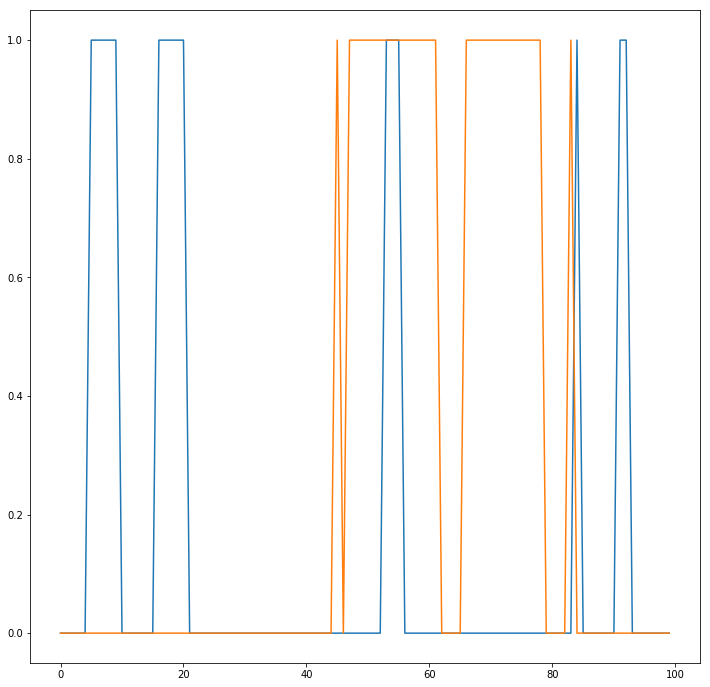

In [59]:
import matplotlib.pyplot as plt

sel1 = train[train['well id'] == 12][0:100].sort_values(by='depth, m')
sel2 = train[train['well id'] == 13][500:600].sort_values(by='depth, m')

sel = [sel1, sel2]
plt.figure(figsize=(12, 12))

for k in range(2):
    plt.plot(sel[k]['goal'].values)

plt.show()

In [112]:
dense_train_scaled.shape

(465096, 12)

In [115]:
sel1.head()

,well id,"depth, m",bk,GZ1,GZ2,GZ3,GZ4,GZ5,GZ7,DGK,NKTD,NKTM,NKTR,ALPS,lith,goal
37254,12.0,2960.3915,0.348636,0.212456,0.962877,0.569947,0.112457,0.171329,0.891596,0.494653,0.358659,0.599186,0.427981,0.319490,ARGILLIT,0.0
50546,12.0,2960.4810,0.352979,0.259688,0.925168,0.553176,0.186954,0.176243,0.891596,0.515214,0.339948,0.579832,0.448637,0.323312,ARGILLIT,0.0
39625,12.0,2960.5705,0.358872,0.246714,0.928635,0.543274,0.163158,0.172269,0.853433,0.514698,0.336253,0.595663,0.453470,0.324556,ARGILLIT,0.0
41453,12.0,2960.7495,0.362284,0.199968,0.916895,0.517749,0.186569,0.173445,0.867248,0.514698,0.328469,0.593859,0.455971,0.324556,ARGILLIT,0.0
47350,12.0,2961.1075,0.393316,0.216673,0.949781,0.498938,0.941165,0.169449,0.773218,0.469875,0.361175,0.585193,0.413462,0.331143,ARGILLIT,0.0


In [125]:
sel1_mtx = dense_train_scaled[sel1.index]
sel2_mtx = dense_train_scaled[sel2.index]

In [171]:
sel3_mtx = sel2_mtx.copy()
sel3_idx = np.zeros(100)
for i, elem in tqdm(enumerate(sel1_mtx)):
    selected_arr = np.array(elem)
    min_dis = 100
    for j, elem2 in enumerate(sel2_mtx):
        selected_2_arr = np.array(elem2)
        dis = np.linalg.norm((selected_arr - selected_2_arr)) ** 0.5

        if dis < min_dis:
            min_dis = dis
            sel3_mtx[i] = selected_2_arr
            sel3_idx[i] = j


0it [00:00, ?it/s]
100it [00:00, 1573.43it/s]

In [172]:
np.linalg.norm(sel1_mtx[0] - sel3_mtx[0])

0.6611589645102943

In [173]:
np.linalg.norm(sel1_mtx[0] - sel3_mtx[1])

0.6611589645102943

In [179]:
sel3_idx

array([ 2.,  2.,  2.,  2.,  0.,  6., 60., 60., 60., 60.,  6.,  6., 95.,
       60., 81., 63., 63., 62., 62., 62., 62., 15.,  2., 51.,  2.,  2.,
        0.,  2.,  2.,  2.,  2.,  2.,  2.,  5.,  5.,  6.,  7.,  7., 60.,
       60., 60., 60., 65.,  7., 60., 60., 66., 29., 85., 85., 85., 85.,
       85.,  7., 63., 63., 64., 65., 65., 65., 65., 65., 66., 65., 60.,
       60., 60., 44., 60., 58., 58., 44., 44., 44., 44., 44., 44., 58.,
        6.,  6., 65., 65., 64., 84., 84., 84., 85., 85., 85., 85., 84.,
       84., 84., 92., 92., 64., 64., 64., 63., 62.])

In [190]:
sel1_mtx.shape

(100, 12)

In [208]:
y_exp_1 = sel1['goal'].values
y_exp_2 = sel2.iloc[sel3_idx]['goal'].values

In [213]:
sum(y_exp_1), sum(y_exp_2), sum(np.abs(y_exp_1 - y_exp_2))

(16.0, 21.0, 29.0)

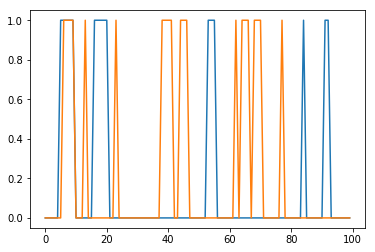

In [209]:
plt.plot(y_exp_1)
plt.plot(y_exp_2)
plt.show()

In [187]:
sel1.iloc[-1]

well id           12
depth, m     3059.92
bk          0.752485
GZ1         0.659425
GZ2         0.375714
GZ3         0.117235
GZ4         0.172792
GZ5         0.468864
GZ7         0.758494
DGK         0.282852
NKTD        0.515818
NKTM        0.583916
NKTR        0.323131
ALPS        0.266832
lith              NK
goal               0
Name: 48301, dtype: object

In [188]:
sel3.iloc[62]

well id           13
depth, m      2323.6
bk           0.49628
GZ1         0.394747
GZ2         0.298834
GZ3         0.264993
GZ4         0.163352
GZ5         0.415985
GZ7         0.624463
DGK         0.388472
NKTD        0.374225
NKTM        0.521351
NKTR        0.489557
ALPS        0.526468
lith         SAND_GL
goal               1
Name: 111961, dtype: object

In [174]:
sel3_mtx

array([[0.72465823, 0.24955773, 0.16964913, ..., 0.43262025, 0.64532522,
        0.4472698 ],
       [0.72465823, 0.24955773, 0.16964913, ..., 0.43262025, 0.64532522,
        0.4472698 ],
       [0.72465823, 0.24955773, 0.16964913, ..., 0.43262025, 0.64532522,
        0.4472698 ],
       ...,
       [0.73509558, 0.99706923, 0.4745518 , ..., 0.4893431 , 0.66501653,
        0.39450114],
       [0.73506722, 0.8987126 , 0.47983639, ..., 0.49004111, 0.66051194,
        0.39535541],
       [0.73503886, 0.8261151 , 0.48363413, ..., 0.49082734, 0.65765067,
        0.39975767]])

In [168]:
sel3_mtx[0]

array([0.72465823, 0.24955773, 0.16964913, 0.7545081 , 0.42134932,
       0.61719434, 0.14870588, 0.67445404, 0.47989692, 0.43262025,
       0.64532522, 0.4472698 ])

In [166]:
sel3.iloc[0]

well id            13
depth, m      2286.72
bk            0.24952
GZ1          0.169645
GZ2          0.754324
GZ3          0.421347
GZ4           0.61717
GZ5          0.148532
GZ7          0.674217
DGK          0.479664
NKTD         0.345923
NKTM         0.515723
NKTR          0.44663
ALPS         0.274478
lith        ALEVROLIT
goal                0
Name: 125230, dtype: object

In [108]:
sel1

,well id,"depth, m",bk,GZ1,GZ2,GZ3,GZ4,GZ5,GZ7,DGK,NKTD,NKTM,NKTR,ALPS,lith,goal
37254,12.0,2960.3915,0.348636,0.212456,0.962877,0.569947,0.112457,0.171329,0.891596,0.494653,0.358659,0.599186,0.427981,0.319490,ARGILLIT,0.0
50546,12.0,2960.4810,0.352979,0.259688,0.925168,0.553176,0.186954,0.176243,0.891596,0.515214,0.339948,0.579832,0.448637,0.323312,ARGILLIT,0.0
39625,12.0,2960.5705,0.358872,0.246714,0.928635,0.543274,0.163158,0.172269,0.853433,0.514698,0.336253,0.595663,0.453470,0.324556,ARGILLIT,0.0
41453,12.0,2960.7495,0.362284,0.199968,0.916895,0.517749,0.186569,0.173445,0.867248,0.514698,0.328469,0.593859,0.455971,0.324556,ARGILLIT,0.0
47350,12.0,2961.1075,0.393316,0.216673,0.949781,0.498938,0.941165,0.169449,0.773218,0.469875,0.361175,0.585193,0.413462,0.331143,ARGILLIT,0.0
51846,12.0,2962.3605,0.568554,0.262570,0.142684,0.891890,0.191983,0.647547,0.189674,0.237772,0.438378,0.578517,0.367231,0.447170,SAND,1.0
44127,12.0,2962.4500,0.668117,0.311713,0.188653,0.153367,0.231132,0.669336,0.179216,0.293328,0.454259,0.589598,0.361335,0.457816,SAND,1.0
39196,12.0,2962.5395,0.696963,0.326955,0.182862,0.113684,0.185535,0.747727,0.158865,0.185823,0.466760,0.596458,0.352726,0.465922,SAND,1.0
26482,12.0,2962.6290,0.725894,0.342217,0.177747,0.115495,0.167956,0.774000,0.138397,0.162314,0.479261,0.633182,0.344418,0.474284,SAND,1.0
39259,12.0,2962.7185,0.683935,0.344477,0.163171,0.169826,0.157747,0.774000,0.126974,0.166672,0.484394,0.596282,0.332399,0.483148,SAND,1.0


In [87]:
sel3

,well id,"depth, m",bk,GZ1,GZ2,GZ3,GZ4,GZ5,GZ7,DGK,NKTD,NKTM,NKTR,ALPS,lith,goal
125230,13.0,2286.7250,0.249520,0.169645,0.754324,0.421347,0.617170,0.148532,0.674217,0.479664,0.345923,0.515723,0.446630,0.274478,ALEVROLIT,0.0
127139,13.0,2286.7250,0.249520,0.169645,0.754324,0.421347,0.617170,0.148532,0.674217,0.479664,0.345923,0.515723,0.446630,0.274478,ALEVROLIT,0.0
128492,13.0,2286.7250,0.249520,0.169645,0.754324,0.421347,0.617170,0.148532,0.674217,0.479664,0.345923,0.515723,0.446630,0.274478,ALEVROLIT,0.0
121742,13.0,2286.7250,0.249520,0.169645,0.754324,0.421347,0.617170,0.148532,0.674217,0.479664,0.345923,0.515723,0.446630,0.274478,ALEVROLIT,0.0
110374,13.0,2286.5460,0.219638,0.173533,0.835496,0.425187,0.672438,0.148532,0.647817,0.451842,0.342149,0.517482,0.439241,0.271787,ALEVROLIT,0.0
101809,13.0,2293.6165,0.126582,0.278489,0.198983,0.988163,0.176769,0.561462,0.166625,0.291619,0.366285,0.516954,0.463939,0.283322,DENSE,0.0
126198,13.0,2319.3030,0.812658,0.471944,0.277695,0.158572,0.251166,0.544776,0.481395,0.181355,0.373125,0.532257,0.395185,0.571436,SAND_ALEV,1.0
114500,13.0,2319.3030,0.812658,0.471944,0.277695,0.158572,0.251166,0.544776,0.481395,0.181355,0.373125,0.532257,0.395185,0.571436,SAND_ALEV,1.0
102011,13.0,2319.3030,0.812658,0.471944,0.277695,0.158572,0.251166,0.544776,0.481395,0.181355,0.373125,0.532257,0.395185,0.571436,SAND_ALEV,1.0
105639,13.0,2319.3030,0.812658,0.471944,0.277695,0.158572,0.251166,0.544776,0.481395,0.181355,0.373125,0.532257,0.395185,0.571436,SAND_ALEV,1.0
